In [1198]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [1199]:
cols=[
      "duration","protocoltype","service","flag","srcbytes","dstbytes","land","wrongfragment","urgent","hot","numfailedlogins","loggedin",
      "numcompromised","rootshell","suattempted","numroot","numfilecreations","numshells","numaccessfiles","numoutboundcmds","ishostlogin",
      "isguestlogin","count","srvcount","serrorrate", "srvserrorrate","rerrorrate","srvrerrorrate","samesrvrate","diffsrvrate","srvdiffhostrate",
      "dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate","dsthostsrvdiffhostrate",
      "dsthostserrorrate","dsthostsrvserrorrate","dsthostrerrorrate","dsthostsrvrerrorrate","attack","lastflag"
      ]

In [1200]:
# Reading CSV Files of Training and Testing Datasets
df_train=pd.read_csv("/content/Train.txt",names=cols)
df_test=pd.read_csv("/content/Test.txt",names=cols)

In [1201]:
# Size of Train and Test Data
df_train.shape,df_test.shape

((125973, 43), (22544, 43))

In [1202]:
# Concatenate Train and Test DataFrames
df=pd.concat([df_train,df_test],ignore_index=True)

In [1203]:
# Size of Dataset
df.shape

(148517, 43)

In [1204]:
df.head()

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [1205]:
# Display the Statistics of Dataset
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,148517.000000,1.485170e+05,1.485170e+05,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,...,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000,148517.000000
mean,276.779305,4.022795e+04,1.708885e+04,0.000215,0.020523,0.000202,0.189379,0.004323,0.402789,0.255062,...,119.462661,0.534521,0.084103,0.145932,0.030584,0.256122,0.251304,0.136220,0.136397,19.278480
std,2460.683131,5.409612e+06,3.703525e+06,0.014677,0.240069,0.019417,2.013160,0.072248,0.490461,22.231375,...,111.232318,0.448061,0.194102,0.308638,0.108975,0.428500,0.429719,0.322741,0.335282,2.739757
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,11.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,72.000000,0.600000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.780000e+02,5.710000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.050000,0.010000,0.600000,0.500000,0.000000,0.000000,21.000000
max,57715.000000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,101.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [1206]:
# Check Value Counts of 'land','urgent','numfailedlogins','numoutboundcmds' Features
df[['land','urgent','numfailedlogins','numoutboundcmds']].value_counts()

land  urgent  numfailedlogins  numoutboundcmds
0     0       0                0                  147868
              1                0                     577
1     0       0                0                      32
0     1       0                0                       9
      0       2                0                       8
              3                0                       8
      2       0                0                       7
      0       4                0                       4
              5                0                       1
      1       2                0                       1
      3       0                0                       1
              2                0                       1
Name: count, dtype: int64

In [1207]:
# The Columns 'land','urgent','numfailedlogins','numoutboundcmds' have mostly Zero Values so we can Drop these Columns
df.drop(['land','urgent','numfailedlogins','numoutboundcmds'],axis=1,inplace=True)

In [1208]:
# Check for Missing Values, If Present We have to Perform Imputation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148517 entries, 0 to 148516
Data columns (total 39 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                148517 non-null  int64  
 1   protocoltype            148517 non-null  object 
 2   service                 148517 non-null  object 
 3   flag                    148517 non-null  object 
 4   srcbytes                148517 non-null  int64  
 5   dstbytes                148517 non-null  int64  
 6   wrongfragment           148517 non-null  int64  
 7   hot                     148517 non-null  int64  
 8   loggedin                148517 non-null  int64  
 9   numcompromised          148517 non-null  int64  
 10  rootshell               148517 non-null  int64  
 11  suattempted             148517 non-null  int64  
 12  numroot                 148517 non-null  int64  
 13  numfilecreations        148517 non-null  int64  
 14  numshells           

In [1209]:
# Target Class Label Counts
df['attack'].value_counts()

attack
normal             77054
neptune            45871
satan               4368
ipsweep             3740
smurf               3311
portsweep           3088
nmap                1566
back                1315
guess_passwd        1284
mscan                996
warezmaster          964
teardrop             904
warezclient          890
apache2              737
processtable         685
snmpguess            331
saint                319
mailbomb             293
pod                  242
snmpgetattack        178
httptunnel           133
buffer_overflow       50
land                  25
multihop              25
rootkit               23
named                 17
ps                    15
sendmail              14
xterm                 13
imap                  12
loadmodule            11
ftp_write             11
xlock                  9
phf                    6
perl                   5
xsnoop                 4
spy                    2
worm                   2
sqlattack              2
udpstorm          

In [1210]:
# Mapping to Respective Labels (Done according to Network Security Domain Knowledge)
mapping={
        'ipsweep': 'Probe','satan': 'Probe','nmap': 'Probe','portsweep': 'Probe','saint': 'Probe','mscan': 'Probe',
        'teardrop': 'DoS','pod': 'DoS','land': 'DoS','back': 'DoS','neptune': 'DoS','smurf': 'DoS','mailbomb': 'DoS',
        'udpstorm': 'DoS','apache2': 'DoS','processtable': 'DoS','perl': 'U2R','loadmodule': 'U2R','rootkit': 'U2R',
        'buffer_overflow': 'U2R','xterm': 'U2R','ps': 'U2R','sqlattack': 'U2R','httptunnel': 'U2R','ftp_write': 'R2L',
        'phf': 'R2L','guess_passwd': 'R2L','warezmaster': 'R2L','warezclient': 'R2L','imap': 'R2L','spy': 'R2L',
        'multihop': 'R2L','named': 'R2L','snmpguess': 'R2L','worm': 'R2L','snmpgetattack': 'R2L','xsnoop': 'R2L',
        'xlock': 'R2L','sendmail': 'R2L','normal': 'Normal'
        }

In [1211]:
'''In this Case, We'll have 5 classes where the activity is defined as: Normal, DoS, Probe, R2L, U2R.
   Hence, the Target variable will have Labels as 0,1,2,3,4'''
df['attack']=df['attack'].apply(lambda x: mapping[x])

In [1212]:
# Target Class Label Counts after Mapping
df['attack'].value_counts()

attack
Normal    77054
DoS       53385
Probe     14077
R2L        3749
U2R         252
Name: count, dtype: int64

In [1213]:
# Check for Categorical dtype Columns
df.select_dtypes(exclude=[np.number])

,protocoltype,service,flag,attack
0,tcp,ftp_data,SF,Normal
1,udp,other,SF,Normal
2,tcp,private,S0,DoS
3,tcp,http,SF,Normal
4,tcp,http,SF,Normal
...,...,...,...,...
148512,tcp,smtp,SF,Normal
148513,tcp,http,SF,Normal
148514,tcp,http,SF,DoS
148515,udp,domain_u,SF,Normal


In [1214]:
# Encode the Columns with Categorical dtype
labels=['protocoltype','service','flag','attack']
for label in labels:
  le=LabelEncoder()
  df[label]=le.fit_transform(df[label])

In [1215]:
# Target Class Label Counts after LabelEncoding
'''
  0: 'DoS',
  1: 'Normal',
  2: 'Probe',
  3: 'R2L',
  4: 'U2R'
'''
df['attack'].value_counts()

attack
1    77054
0    53385
2    14077
3     3749
4      252
Name: count, dtype: int64

<Axes: >

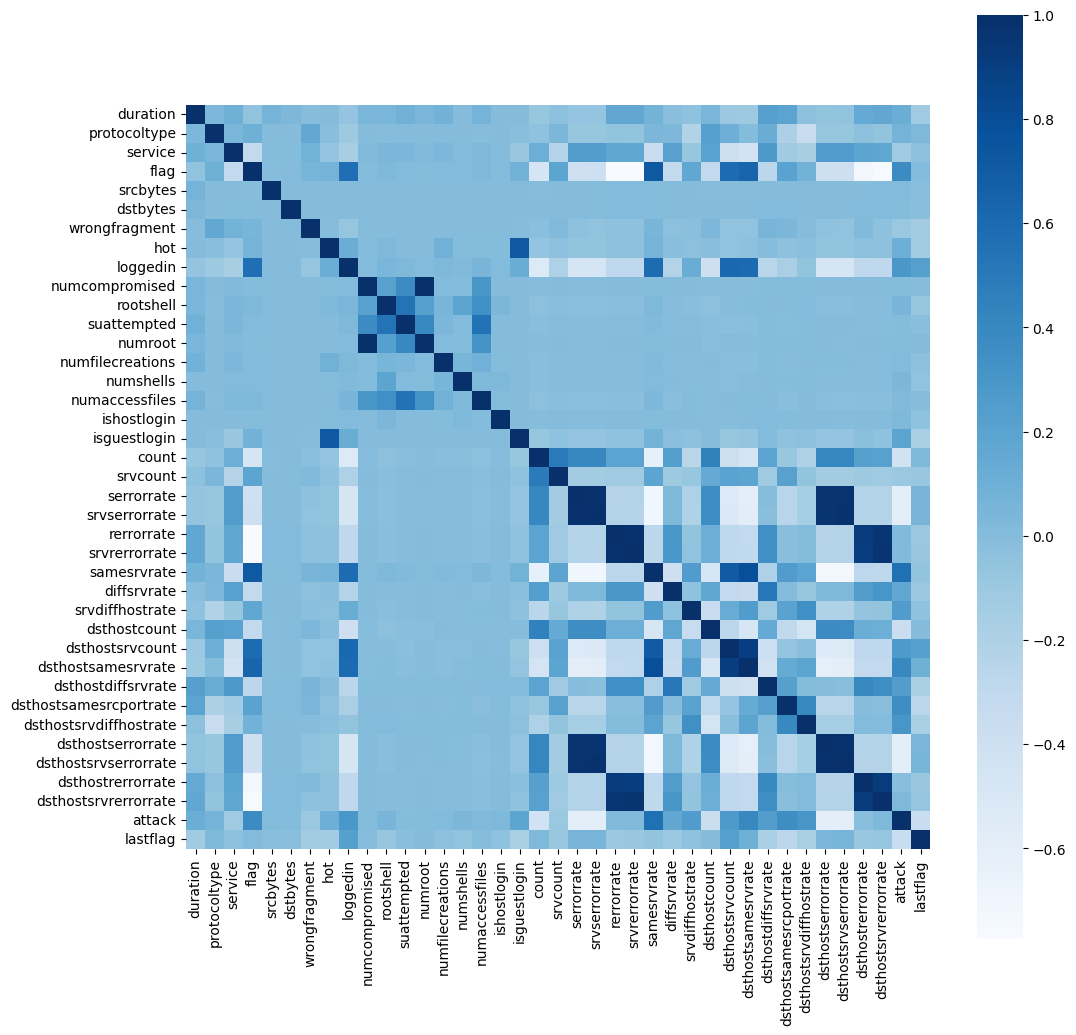

In [1216]:
# HeatMap to Understand the Correlation Between all Features
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),cbar=True,square=True,annot_kws={'size':10},cmap='Blues')

[Text(0, 0, 'DoS'),
 Text(1, 0, 'Normal'),
 Text(2, 0, 'Probe'),
 Text(3, 0, 'R2L'),
 Text(4, 0, 'U2L')]

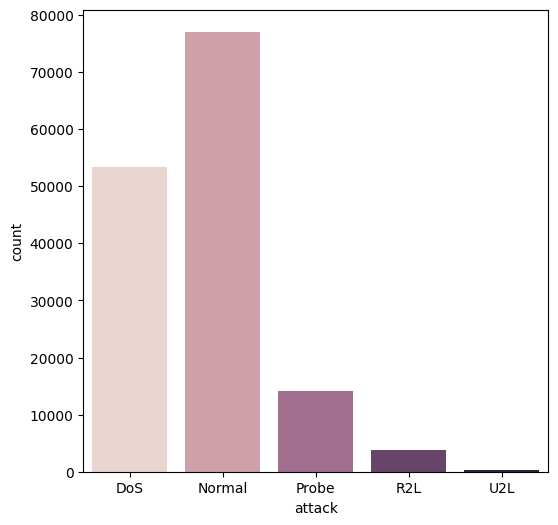

In [1217]:
# Checking for Class Imbalancy using Count Plot
plt.figure(figsize=(6,6))
ax=sns.countplot(x='attack',data=df,hue='attack',legend=False)
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(['DoS','Normal','Probe','R2L','U2L'])

In [1218]:
# Seperate Target label from Data
x=df.drop(columns='attack',axis=1)
y=df.iloc[:,37]
feature_names=x.columns

In [1219]:
# Standardizing the Features
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [1220]:
# Split the Data into Training and Testing Data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [1221]:
# As there is huge Class Imbalancy and more no. of Features, Random Forest Ensemble Method is the Suitable Model
# Create Instance for RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)

# Train the Initial Model
clf.fit(x_train,y_train)

# Evaluate Initial Model Performance on Test Set
y_pred=clf.predict(x_test)

# Print the Accuracy on Test Data
initial_accuracy=accuracy_score(y_test,y_pred)
print(f"Initial Accuracy on Test Set : {initial_accuracy:.5f}")

Initial Accuracy on Test Set : 0.99900


In [1222]:
# Feature Selection
# Get Feature Importances
feature_importances=clf.feature_importances_

# Create DataFrame to Show Feature Importances
feature_importances_df=pd.DataFrame({'Feature':feature_names,'Importance':feature_importances})

# Sort Features by Importance
feature_importances_df=feature_importances_df.sort_values(by='Importance',ascending=False)

# Manually Select Top 6 Features Based on Importance
selected_features=feature_importances_df['Feature'][:6].values

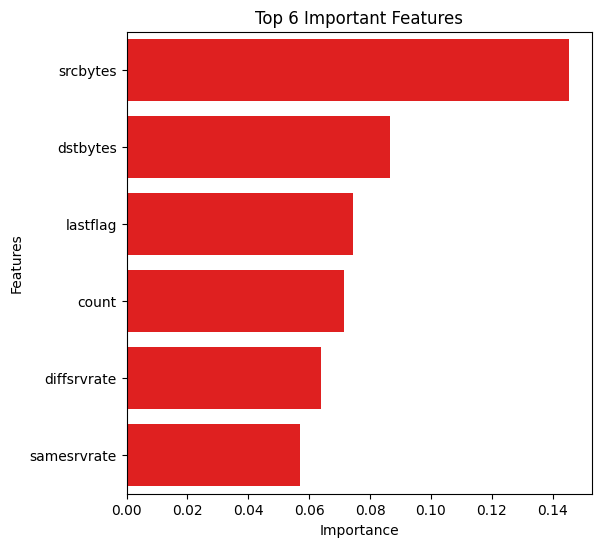

In [1223]:
# Plot Important Features
plt.figure(figsize=(6,6))
sns.barplot(x='Importance',y='Feature',data=feature_importances_df.head(6),color="r")
plt.title('Top 6 Important Features')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

<Axes: >

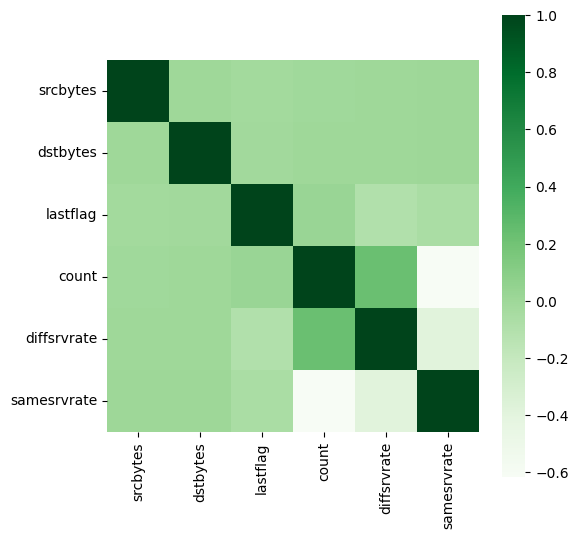

In [1224]:
# HeatMap to Understand the Correlation Between Selected Features
plt.figure(figsize=(6,6))
sns.heatmap(df.drop(columns="attack",axis=1)[selected_features].corr(),cbar=True,square=True,annot_kws={'size':10},cmap='Greens')

In [1225]:
# Standardize Feature Selected Data
x=scaler.fit_transform(df[selected_features])

In [1226]:
# Split the Data into Training and Testing Data
x_train_reduced,x_test_reduced,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)

In [1227]:
# Train a New RandomForestClassifier with Reduced Features
classifier=RandomForestClassifier(n_estimators=100)
classifier.fit(x_train_reduced,y_train)

# Evaluate the Reduced Model on Test Set
y_pred_reduced=classifier.predict(x_test_reduced)
accuracy=accuracy_score(y_test,y_pred_reduced)

# Print the Accuracy after Feature Selection
print(f"Selected Features : {selected_features}")
print(f"Best Accuracy on Test Set with {len(selected_features)} Features : {accuracy:.5f}")

Selected Features : ['srcbytes' 'dstbytes' 'lastflag' 'count' 'diffsrvrate' 'samesrvrate']
Best Accuracy on Test Set with 6 Features : 0.99184


[Text(0, 0.5, 'DoS'),
 Text(0, 1.5, 'Normal'),
 Text(0, 2.5, 'Probe'),
 Text(0, 3.5, 'R2L'),
 Text(0, 4.5, 'U2R')]

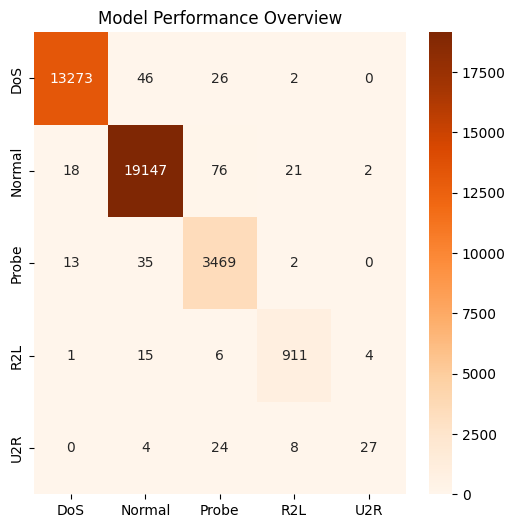

In [1228]:
# Visualize Confusion Matrix
cm=confusion_matrix(y_test,y_pred_reduced)
plt.figure(figsize=(6,6))
plt.title("Model Performance Overview")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
ax=sns.heatmap(cm,annot=True,fmt="d",cmap="Oranges",cbar=True)
ax.set_xticks([0.5,1.5,2.5,3.5,4.5])
ax.set_yticks([0.5,1.5,2.5,3.5,4.5])
ax.set_xticklabels(['DoS','Normal','Probe','R2L','U2R'])
ax.set_yticklabels(['DoS','Normal','Probe','R2L','U2R'])

In [1229]:
df[np.append(selected_features,'attack')].tail(40)

,srcbytes,dstbytes,lastflag,count,diffsrvrate,samesrvrate,attack
148477,0,0,18,444,1.00,0.00,2
148478,0,0,20,236,0.07,0.07,0
148479,950,367,21,1,0.00,1.00,1
148480,32,86,21,2,0.00,1.00,1
148481,336,1203,21,111,0.00,1.00,1
148482,24,109,8,3,1.00,0.33,2
148483,1008,0,18,200,0.00,1.00,0
148484,235,892,21,2,0.00,1.00,1
148485,0,0,18,173,0.09,0.01,0
148486,126,174,10,1,0.00,1.00,3


In [1232]:
# Evaluate on Sample Input
input=[45,214,4,1,0.00,1.00]
input_df=pd.DataFrame([input],columns=selected_features)
input_df=scaler.transform(input_df)
prediction=classifier.predict(input_df)
mapper={0:'Denial of Service (DoS)',1:'Normal',2:'Probe',3:'Remote to Local (R2L)',4:'User to Root (U2R)'}
print("Predicted Class Label :",mapper[prediction[0]])

Predicted Class Label : User to Root (U2R)


In [1234]:
# Saving the Trained Model and Scaler Object
pickle.dump(classifier,open('Trained_Model.pkl','wb'))
pickle.dump(scaler,open('Scaler.sav','wb'))